In [4]:
from sklearn.linear_model import LinearRegression
from typing import Any, Union
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import string
from IPython.display import display
import pyMechkar as mechkar
from scipy import stats
from random import shuffle
from sklearn.metrics import mean_absolute_error
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
#desired_width=520
#pd.set_option('display.width', desired_width)
#np.set_printoptions(linewidth=desired_width)
#pd.set_option('display.max_columns',18)

In [3]:
Data = pd.read_csv("final_csv1_full_v3.csv", header=0)
#pd.options.display.max_columns = 13
#display(Data)
print(Data.head())

   Customer_ID  Weeknum  Product  Customer_Number  Sum_Quantity  \
0       0.0048       11       17        416000001            33   
1       0.0048       12       17        416000001            44   
2       0.0048       13       17        416000001            33   
3       0.0048       14       17        416000001             0   
4       0.0048       15       17        416000001             3   

   Avg_Price_Change  Avg_Price_Change_1  Sum_Quantity_1_minus_Sum_Quantity  \
0              3.61                3.61                                 55   
1              3.61                3.61                                 55   
2              3.61                3.65                                -33   
3              3.65                3.61                                  3   
4              3.61                3.61                                 27   

   Avg_Quantity_for_Week  Avg_Quantity_for_PO        ...         \
0                  41.74                41.74        ...     

In [ ]:
Data.describe()

In [ ]:
Data.dtypes

In [ ]:
Data.dtypes[Data.dtypes=='float64']

In [ ]:
## determine the number of missing values
Data.isna().sum()

In [ ]:
## Ploting bivariate relationtips. This graph will show the scatterplot for each combination and at 
## the diagonal will show the histogram of the variable. This graph helps to detect correlations and 
## outliers
sns.pairplot(Data, height=2)
plt.show()

In [ ]:
sns.boxplot(x=Data['Product'], y=Data['Sum_Quantity'])
plt.show()

In [ ]:
sns.jointplot(x=Data['Product'], y=Data['Avg_Quantity_for_PO'])
plt.show()

In [ ]:
sns.jointplot(x=Data['Avg_Quantity_for_PO'], y=Data['Avg_Quantity_for_Week'])
plt.show()

In [ ]:
Data2 = Data.copy()

In [ ]:
Data2['Product'] = Data2['Product'].astype('category')


In [ ]:
Data2['Customer_Number'] = Data2['Customer_Number'].astype('category')

In [ ]:
Data2.dtypes

In [ ]:
sns.boxplot(x=Data2['Standard_Price'], y=Data2['Product'])
plt.show()

In [ ]:
## Customet_ID alse reprosent the share of the customer, Customer number is the name of the customrt 
sns.boxplot(x=Data2['Customer_Number'], y=Data2['Customer_ID'])
plt.show()
# you can see that there are a few "big" customers, however the majority looks a like

In [ ]:
sns.boxplot(x=Data2['Weeknum'], y=Data2['Sum_Quantity'])
plt.show()

In [ ]:
sns.boxplot(x=Data2['Product'], y=Data2['Avg_Quantity_for_PO'])
plt.show()

In [ ]:
sns.distplot(Data['Standard_Price'])
plt.show()

In [ ]:
sns.distplot(Data['Sum_Quantity'])
plt.show()

In [ ]:
sns.distplot(Data['Avg_Quantity_for_PO'])
plt.show()

In [ ]:
sns.distplot(Data['Temp_Hi'])
plt.show()

In [ ]:
sns.distplot(Data['Temp_Lo'])
plt.show()

In [ ]:
## it was a try to minimize the DB in order to get a P value for Y (Sum_Quantity_1_Y), however our Y is not a category 

##Data3 = Data2.drop(columns=['Avg_Price_Change','Sum_Quantity_1_minus_Sum_Quantity','Avg_Quantity_for_Week' , 'All_week', 'Count_week_PO', 'Above_Standard_Price', 'Below_Standard_Price', 'Total_Quantity','Avg_Price_Change_1','Temp_Hi','Temp_Lo','Temp_Rain','Frequency_PO','Holiday' ])
##Data3.head

In [ ]:
tab1=mechkar.pyMechkar().Table1(data=Data2, y='Customer_number' )
tab1

In [ ]:
mechkar.pyMechkar().exploreData(data=Data2)


In [ ]:
print (Data2.groupby('Product').agg({'Sum_Quantity':['count',sum,'mean']}))

In [ ]:
print (Data2)

In [ ]:
## stop at "defining the error" @ Tree based models - Hyperparamaters

In [ ]:
Data2ByProduct = Data2.sort_values(by=['Product', 'Weeknum'])
print(Data2ByProduct)

In [ ]:
plt.plot (Data2ByProduct.Weeknum, Data2ByProduct.Sum_Quantity)

In [ ]:
# we can see that in week 14 the quantities are very high, and on week 15 are very low, 

In [ ]:
# extract a single product (17) and plot its quantities per week
P17 = Data2ByProduct.Product == 17
Prod17 = Data2ByProduct.copy()[P17]
Prod17.head()

In [ ]:
plt.plot (Prod17.Weeknum, Prod17.Sum_Quantity)
plt.plot (Prod17.Weeknum, Prod17.Standard_Price)
#plt.plot (Prod17.Weeknum, Prod17.Holiday, label ='Holiday')
#eyal# it doesnt allow me to add Holidays even when in Int type 
plt.title ('17')

In [ ]:
Prod17.describe()

It can be seen that the quantities are subjected to the Holidays (@ week 15)

In [ ]:
# For multivariate outlier detection we can use DBSCAN. 
#This algorithm search for aggregation of points that are combined and leave out of them the outlier points.
# X is an numpy array
X = Data3.copy()

def dbscan_mvoutliers(X):
    from sklearn.cluster import DBSCAN
    from sklearn.preprocessing import StandardScaler
    # scale data first
    X = StandardScaler().fit_transform(X.values)

    db = DBSCAN(eps=0.5, min_samples=50).fit(X)
    labels = db.labels_

    plt.figure(figsize=(20,20))

    unique_labels = set(labels)
    colors = ['blue', 'red']

    for color,label in zip(colors, unique_labels):
        sample_mask = [True if l == label else False for l in labels]
        plt.plot(X[:,0][sample_mask], Data2[:, 1][sample_mask], 'o', color=color);
    plt.xlabel('x');
    plt.ylabel('y');
    return(db)

In [ ]:
## NOTE: it doesnt work 'slice' error
##dbsc1 = dbscan_mvoutliers(Data)

## Find corelation and P-Values 

In [ ]:
df = pd.DataFrame(Data, columns = ['Sum_Quantity','Sum_Quantity_1_Y'])
from scipy import stats 

pearson_coef, p_value = stats.pearsonr(df["Sum_Quantity"], df["Sum_Quantity_1_Y"]) #define the columns to perform calculations on
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value) # Results 


In [ ]:
from scipy.stats import pearsonr
import pandas as pd

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [ ]:
## Calculate the P Value of the different paramaters (The p-value roughly indicates the probability of an uncorrelated system therefore we are looking for thos)
calculate_pvalues(Data)

In [ ]:
show_p = calculate_pvalues(Data)

In [ ]:
plt.plot(show_p['Sum_Quantity_1_Y'])
plt.show()

In [202]:
## present the corelletion (+1 or -1 implying corelation where exeact -1 or 1 implaying linear corr; 0 implying NO corr)
df = pd.DataFrame(data=Data)
df.corr()

,Customer_ID,Weeknum,Product,Customer_Number,Sum_Quantity,Avg_Price_Change,Avg_Price_Change_1,Sum_Quantity_1_minus_Sum_Quantity,Avg_Quantity_for_Week,Avg_Quantity_for_PO,...,Above_Standard_Price,Below_Standard_Price,Total_Quantity_for_Customer,Total_Quantity,Holiday,Temp_Hi,Temp_Lo,Temp_Rain,Frequency_PO,Sum_Quantity_1_Y
Customer_ID,1.000000,0.007963,-0.008398,0.108949,0.140236,0.018184,0.017724,0.074138,0.186231,0.171686,...,0.014056,-0.072639,0.999972,NaN,-0.001083,0.008295,0.011396,-0.001207,-0.092541,0.139958
Weeknum,0.007963,1.000000,0.006760,0.002670,0.005176,0.006797,0.007296,0.009902,-0.003235,0.000763,...,0.053596,-0.051498,0.007939,NaN,-0.394184,0.661595,0.934874,-0.293873,0.010034,0.007248
Product,-0.008398,0.006760,1.000000,-0.007190,-0.099841,0.144201,0.144053,-0.122658,-0.156349,-0.098648,...,0.022901,-0.006279,-0.008322,NaN,-0.003990,0.005720,0.007133,-0.005286,0.093635,-0.096936
Customer_Number,0.108949,0.002670,-0.007190,1.000000,0.028880,-0.006470,-0.006354,0.048882,0.041713,0.035374,...,-0.006570,-0.002431,0.108633,NaN,-0.004465,0.003573,0.003193,-0.003758,-0.004053,0.027279
Sum_Quantity,0.140236,0.005176,-0.099841,0.028880,1.000000,-0.123152,-0.122806,0.395034,0.688745,0.678986,...,0.016830,-0.190138,0.140303,NaN,0.010521,0.008050,0.002808,0.000371,0.017045,0.379380
Avg_Price_Change,0.018184,0.006797,0.144201,-0.006470,-0.123152,1.000000,0.998576,-0.060664,-0.160904,-0.166589,...,0.266395,0.014297,0.018137,NaN,-0.005217,0.005963,0.007910,-0.003508,0.047088,-0.124564
Avg_Price_Change_1,0.017724,0.007296,0.144053,-0.006354,-0.122806,0.998576,1.000000,-0.061011,-0.161069,-0.167288,...,0.256477,0.018494,0.017679,NaN,-0.005652,0.006879,0.008276,-0.005344,0.046039,-0.125570
Sum_Quantity_1_minus_Sum_Quantity,0.074138,0.009902,-0.122658,0.048882,0.395034,-0.060664,-0.061011,1.000000,0.608408,0.429966,...,-0.023968,0.031888,0.074183,NaN,-0.016164,0.001111,0.007687,0.001271,-0.079862,0.667559
Avg_Quantity_for_Week,0.186231,-0.003235,-0.156349,0.041713,0.688745,-0.160904,-0.161069,0.608408,1.000000,0.831337,...,-0.028203,-0.063583,0.186335,NaN,0.000096,-0.001732,-0.002391,0.003171,-0.127916,0.686235
Avg_Quantity_for_PO,0.171686,0.000763,-0.098648,0.035374,0.678986,-0.166589,-0.167288,0.429966,0.831337,1.000000,...,-0.008412,0.040116,0.171770,NaN,-0.009004,-0.001172,-0.002082,0.004711,0.191741,0.691566


In [98]:
show_corr = df.corr()

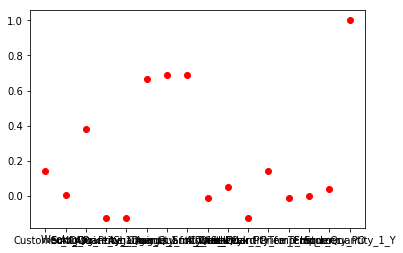

In [99]:
plt.plot(show_corr['Sum_Quantity_1_Y'], 'ro')
plt.show()

In [17]:
y = Data.values[:, -1]
x = Data.values[:, 2:-1]

In [18]:
indexes = [x for x in range(len(y))]
shuffle(indexes)
border = int(0.10 * len(indexes))
test_indx = indexes[: border]
train_indx = indexes[border :]

In [19]:
x_train = x[train_indx]
x_test = x[test_indx]
y_train = y[train_indx]
y_test = y[test_indx]
Data.dtypes

Customer_ID                          float64
Weeknum                                int64
Product                                int64
Customer_Number                        int64
Sum_Quantity                           int64
Avg_Price_Change                     float64
Avg_Price_Change_1                   float64
Sum_Quantity_1_minus_Sum_Quantity      int64
Avg_Quantity_for_Week                float64
Avg_Quantity_for_PO                  float64
All_week                               int64
Count_week_PO                          int64
Standard_Price                       float64
Above_Standard_Price                   int64
Below_Standard_Price                   int64
Total_Quantity_for_Customer            int64
Total_Quantity                         int64
Holiday                                int64
Temp_Hi                              float64
Temp_Lo                              float64
Temp_Rain                              int64
Frequency_PO                         float64
Sum_Quanti

In [20]:
# Train number of line (90%)
len (x_train)

107077

In [21]:
#test number of lines (10%)
len (x_test)

11897

In [22]:
mod_linear = LinearRegression(n_jobs=-1)
mod_linear.fit(x_train, y_train)
pred_linear = mod_linear.predict(x_test)
pred_linear = np.round(pred_linear)
## pred_linear_cvs = mod_linear.predict(csvTest) ## write to file
acc_linear=accuracy_score(y_test, pred_linear, normalize=False)
print("acc linear", acc_linear)
mae_linear = mean_absolute_error(y_test, pred_linear)
print("MAE linear", mae_linear)

acc linear 462
MAE linear 14.363116752122384


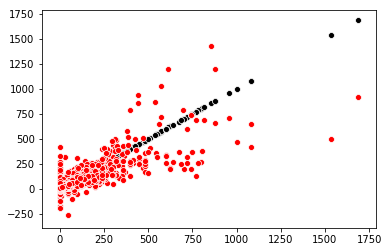

In [23]:
sns.scatterplot(x=y_test, y=y_test, color="black")
sns.scatterplot(x=y_test, y=pred_linear, color="red")
plt.show()

In [24]:
mod_svm = svm.SVC (kernel='sigmoid',gamma=3 ,probability=False, random_state=0)
y_pred_svm = mod_svm.fit(x_train,y_train)
pred_svm = mod_svm.predict(x_test)
## pred_svm_cvs = mod_svm.predict(csvTest) ## write to file
acc_svm=accuracy_score(y_test,pred_svm, normalize=False)
print("acc svm", acc_svm)
mae_svm = mean_absolute_error(y_test, pred_svm)
print("MAE svm",mae_svm)

acc svm 2748
MAE svm 29.553668992182903


In [25]:
## using sigmoid 
## Acc 2741
## MAE 29.0724

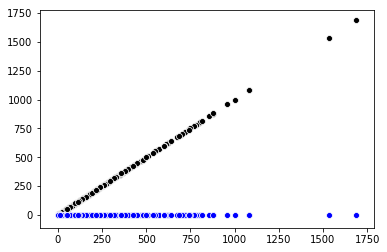

In [26]:
sns.scatterplot(x=y_test, y=y_test, color="black")
sns.scatterplot(x=y_test, y=pred_svm, color="blue")
plt.show()

In [27]:
from sklearn.ensemble import AdaBoostClassifier
mod_rforest = AdaBoostClassifier(random_state=2, algorithm='SAMME.R', n_estimators=50)
y_pred_AdaBoost = mod_rforest.fit(x_train,y_train)
pred_AdaBoost = mod_rforest.predict(x_test)
#pred_adaBoost_cvs = mod_rforest.predict(csvTest) 
acc_adaBoost = accuracy_score(y_test,pred_AdaBoost, normalize=False)
print("acc AdaBoost", acc_adaBoost)
mea_adaBoost = mean_absolute_error(y_test,pred_AdaBoost)
print("mea AdaBoost", mea_adaBoost)

acc AdaBoost 1510
mea AdaBoost 25.31949230898546


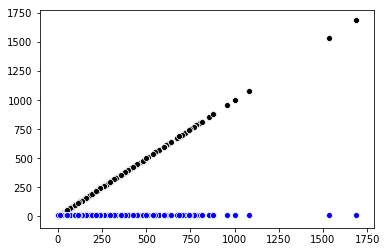

In [28]:
sns.scatterplot(x=y_test, y=y_test, color="black")
sns.scatterplot(x=y_test, y=pred_AdaBoost, color="blue")
plt.show()

In [29]:
from sklearn.naive_bayes import GaussianNB
mod_bayes = GaussianNB()
y_pred_naive = mod_bayes.fit(x_train,y_train)
pred_naive = mod_bayes.predict(x_test)
acc_naive=accuracy_score(y_test, pred_naive, normalize=False)
print("acc naive", acc_naive)
mae_naive = mean_absolute_error(y_test, pred_naive)
print("MAE naive", mae_naive)

acc naive 6
MAE naive 172.66520971673532


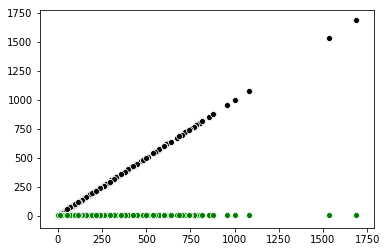

In [30]:
sns.scatterplot(x=y_test, y=y_test, color="black")
sns.scatterplot(x=y_test, y=acc_naive, color="green")
plt.show()

In [31]:
from sklearn.linear_model import LogisticRegression
mod_logistic = LogisticRegression()
mod_logistic.fit(x_train,y_train)
pred_logistic = mod_logistic.predict(x_test)
acc_logistic=accuracy_score(y_test, pred_logistic, normalize=False)
print("acc logistic", acc_logistic)
mae_logistic = mean_absolute_error(y_test, pred_logistic)
print("MAE logistic", mae_logistic)

acc logistic 2748
MAE logistic 29.553668992182903


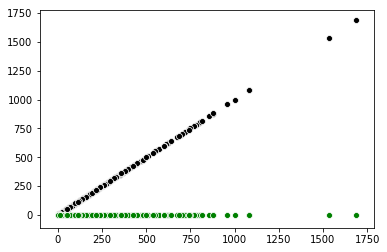

In [32]:
sns.scatterplot(x=y_test, y=y_test, color="black")
sns.scatterplot(x=y_test, y=pred_logistic, color="green")
plt.show()

## Initiate a new database of high corelation columns 

In [33]:
## it was a try to minimize the DB in order to get a P value for Y (Sum_Quantity_1_Y), however our Y is not a category 

DropData = Data.drop(columns=['Avg_Quantity_for_Week','Below_Standard_Price','Total_Quantity','Holiday','Temp_Hi','Temp_Lo','Temp_Rain'])
print(DropData)

        Customer_ID  Weeknum        Product  Customer_Number  Sum_Quantity  \
0            0.0048       11             17        416000001            33   
1            0.0048       12             17        416000001            44   
2            0.0048       13             17        416000001            33   
3            0.0048       14             17        416000001             0   
4            0.0048       15             17        416000001             3   
5            0.0048       16             17        416000001            30   
6            0.0048       17             17        416000001             3   
7            0.0048       18             17        416000001            92   
8            0.0048       19             17        416000001            33   
9            0.0048       20             17        416000001            50   
10           0.0048       21             17        416000001            17   
11           0.0048       22             17        416000001    

In [34]:
DropData.dtypes

Customer_ID                          float64
Weeknum                                int64
Product                                int64
Customer_Number                        int64
Sum_Quantity                           int64
Avg_Price_Change                     float64
Avg_Price_Change_1                   float64
Sum_Quantity_1_minus_Sum_Quantity      int64
Avg_Quantity_for_PO                  float64
All_week                               int64
Count_week_PO                          int64
Standard_Price                       float64
Above_Standard_Price                   int64
Total_Quantity_for_Customer            int64
Frequency_PO                         float64
Sum_Quantity_1_Y                       int64
dtype: object

In [35]:
y2 = DropData.values[:, -1]
x2 = DropData.values[:, 2:-1]

In [36]:
indexes = [x2 for x2 in range(len(y))]
shuffle(indexes)
border = int(0.10 * len(indexes))
test_indx = indexes[: border]
train_indx = indexes[border :]

x2_train = x2[train_indx]
x2_test = x2[test_indx]
y2_train = y2[train_indx]
y2_test = y2[test_indx]

In [37]:
from sklearn.ensemble import AdaBoostClassifier
mod_rforest = AdaBoostClassifier(random_state=2, algorithm='SAMME.R', n_estimators=50)
y2_pred_AdaBoost = mod_rforest.fit(x2_train,y2_train)
pred_AdaBoost = mod_rforest.predict(x2_test)
#pred_adaBoost_cvs = mod_rforest.predict(csvTest) 
acc_adaBoost = accuracy_score(y2_test,pred_AdaBoost, normalize=False)
print("acc AdaBoost", acc_adaBoost)
mea_adaBoost = mean_absolute_error(y2_test,pred_AdaBoost)
print("mea AdaBoost", mea_adaBoost)

acc AdaBoost 1546
mea AdaBoost 25.791712196352023


In [38]:
## while removing more parameters the ACC is lower, for example removing äbove standard price - 4037; removing customer number - lower then 2000
## with Below standard price - 3945 
## adding weeknum - 3980